In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report


In [2]:

# Step 1: Load the data
train_df = pd.read_csv('data/train_test/HOG/train_HOG.csv')
test_df = pd.read_csv('data/train_test/HOG/test_HOG.csv')

# Separate features and labels
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']

X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

# Step 2: Preprocess the data
# Normalize pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = encoder.transform(y_test.values.reshape(-1, 1))

print('Train: ' + str(len(X_train)) + ' Test: ' + str(len(X_test)))

Train: 2500 Test: 300


In [3]:

# # Step 3: Build the ANN model
# model = keras.Sequential([
#     keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(100, activation='softmax')  # 100 classes
# ])

# Step 3: Build the ANN model with optimizations
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(100, activation='softmax')  # 100 classes
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\PC-MOH\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Step 5: Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=75, batch_size=32)


Epoch 1/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.0733 - loss: 5.0566 - val_accuracy: 0.0000e+00 - val_loss: 10.0465
Epoch 2/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6294 - loss: 2.1836 - val_accuracy: 0.0000e+00 - val_loss: 14.9039
Epoch 3/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8830 - loss: 1.0556 - val_accuracy: 0.0000e+00 - val_loss: 16.4376
Epoch 4/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9319 - loss: 0.8264 - val_accuracy: 0.0000e+00 - val_loss: 17.7554
Epoch 5/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9487 - loss: 0.7214 - val_accuracy: 0.0000e+00 - val_loss: 19.9372
Epoch 6/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9729 - loss: 0.6290 - val_accuracy: 0.0000e+00 - val_loss: 19.8554
Epoch 7/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9649 - loss: 0.6572 - val_accuracy: 0.0000e+00 - val_loss: 19.2693
Epoch 8/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9708 - loss

In [7]:

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# Step 7: Generate classification report
y_pred = model.predict(X_test)
y_pred_labels = encoder.inverse_transform(y_pred)
y_test_labels = encoder.inverse_transform(y_test)
print(classification_report(y_test_labels, y_pred_labels))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9370 - loss: 1.2206 
Test accuracy: 0.85
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           5       0.43      1.00      0.60         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       0.50      1.00      0.67         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       0.75      1.00      0.86         3
 

c:\Users\PC-MOH\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC-MOH\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC-MOH\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


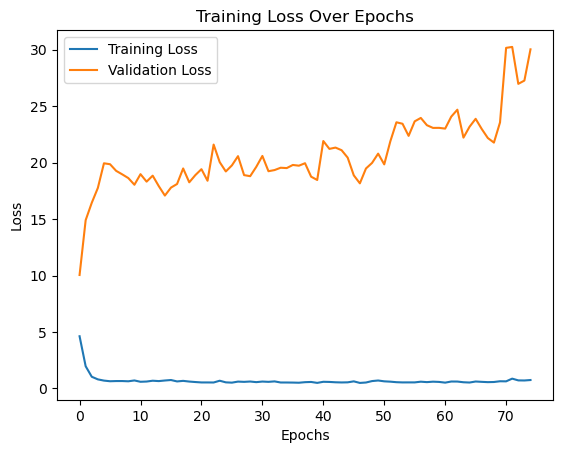

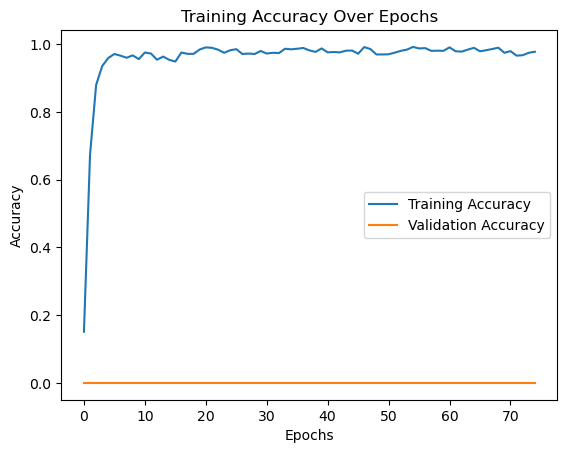

In [8]:
import matplotlib.pyplot as plt

# Plot the training loss over epochs
plt.plot(history.history['loss'], label='Training Loss')  # Training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Training loss over epochs
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.title('Training Loss Over Epochs')  # Plot title
plt.legend()  # Display the legend
plt.show()  # Display the plot

# Plot the training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Training accuracy over epochs
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Training Accuracy Over Epochs')  # Plot title
plt.legend()  # Display the legend
plt.show()  # Display the plot
